# Sprint 2: Spotify Data Exploration 
Sarah Wimbish \
DS 4003 

For this project, I plan to use two data sets that both explore Spotify data. The first data set is my own personal Spotify streaming history which includes all of my music streaming over the past year listing song title, artist, milliseconds played, and the time that I stopped playing the each song. The second data set is pulled from [kaggle](https://www.kaggle.com/datasets/yukawithdata/spotify-top-tracks-2023?resource=download), but is sourced from the top 50 most streamed song list put out by Spotify at the end of 2023. This data set contains Spotify metrics on each of the top 50 songs that allows a closer look at the musicality of these songs compared to the data available on my personal data. I want to use both of these data sets so I can look at the data from a more personal perspective, as well as a more global perspective. 

### DATA IS IN THE DATA FOLDER 
labeled data.csv (personal) and data2.csv (global)

# Cleaning the Data
Both of these  data sets are almost tidy upon uploading them, the main thing that needs to be cleaned in making sure each variable is the correct data type. My personal data set also needs to be combined from the four data sets it is currently in to a single data set. There are a few things that I want to add to my personal dataset that will make it more useful when creating visualizations. 

In [2]:
# import dependencies 
import pandas as pd
import numpy as np 
import seaborn as sns 
import plotly.express as px 
from datetime import datetime
import textwrap

### Importing and Cleaning Personal Data

In [3]:
# import personal streaming data 
streaminghistory1 = pd.read_json("../data/StreamingHistory_music_0.json", orient='columns')
streaminghistory2 = pd.read_json("../data/StreamingHistory_music_1.json", orient='columns')
streaminghistory3 = pd.read_json("../data/StreamingHistory_music_2.json", orient='columns')
streaminghistory4 = pd.read_json("../data/StreamingHistory_music_3.json", orient='columns')
# combine into one data frame 
personal = pd.concat([streaminghistory1, streaminghistory2, streaminghistory3, streaminghistory4]).reset_index()


# endTime needs to be made into a datetime object 
# endTIme is also in UTC so I want to change it to EST
personal['endTime'] = pd.to_datetime(personal['endTime'])
personal['endTime'] = personal['endTime'] - pd.Timedelta(hours=5)

# all the types are looking good now 
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30811 entries, 0 to 30810
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       30811 non-null  int64         
 1   endTime     30811 non-null  datetime64[ns]
 2   artistName  30811 non-null  object        
 3   trackName   30811 non-null  object        
 4   msPlayed    30811 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.2+ MB


### Creating Potentially Useful Variables (Personal)
After brainstorming some types of visuals I might want to make, there are some variables that I want to add to the dataset to make it easier int eh future to make certain graphs. 

In [4]:
# creating a seconds variable  
personal['seconds'] = personal['msPlayed'] / 1000

# creating a minutes variable 
personal['minutes'] = personal['seconds'] / 60

# create a variable that tells whether or not I actually listened to the song 
# this is determined by whether I listened to 30 or more seconds of the song 
# *obviously wont be perfect but it should work well enough for the purpose of this project
personal['played'] = np.where(personal['seconds'] > 30, True, False)

# extract just the date 
personal['date'] = personal['endTime'].dt.normalize()

# label the day of the week each some was played 
personal['dayofweek'] = personal['date'].dt.day_name()

# extra the hour that the song was listened to 
personal['hour'] = personal['endTime'].dt.hour

# when during the day was the song listened to 
# morning is 5am-12pm, afternoon is 12pm-6pm, and night is 6pm-5am 
personal['timeofday'] = np.where((personal.hour > 5) & (personal.hour < 12), 'Morning', 
                                 np.where((personal.hour > 12) & (personal.hour < 18), 'Afternoon', 'Night'))

# everything is looking good 
personal.head()

,index,endTime,artistName,trackName,msPlayed,seconds,minutes,played,date,dayofweek,hour,timeofday
0,0,2023-03-01 19:04:00,M. Ward,Rave On,8280,8.280,0.138000,False,2023-03-01,Wednesday,19,Night
1,1,2023-03-01 19:04:00,James Blunt,Bonfire Heart,970,0.970,0.016167,False,2023-03-01,Wednesday,19,Night
2,2,2023-03-01 19:04:00,Frankie Cosmos,Jesse,4653,4.653,0.077550,False,2023-03-01,Wednesday,19,Night
3,3,2023-03-01 19:04:00,Cage The Elephant,How Are You True,280946,280.946,4.682433,True,2023-03-01,Wednesday,19,Night
4,4,2023-03-01 19:04:00,Saint Motel,Sweet Talk,1110,1.110,0.018500,False,2023-03-01,Wednesday,19,Night


### Importing and Cleaning Global Data 

In [10]:
# import global data 
world = pd.read_csv('../data/top_50_2023.csv')

world['album_release_date'] = pd.to_datetime(world['album_release_date'])

world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   artist_name         50 non-null     object        
 1   track_name          50 non-null     object        
 2   is_explicit         50 non-null     bool          
 3   album_release_date  50 non-null     datetime64[ns]
 4   genres              50 non-null     object        
 5   danceability        50 non-null     float64       
 6   valence             50 non-null     float64       
 7   energy              50 non-null     float64       
 8   loudness            50 non-null     float64       
 9   acousticness        50 non-null     float64       
 10  instrumentalness    50 non-null     float64       
 11  liveness            50 non-null     float64       
 12  speechiness         50 non-null     float64       
 13  key                 50 non-null     int64         
 

### Creating Potentially Useful Variables (Global) 
Although there are not as many variables I want to add to this dataset, I would like to convert duration_ms to minutes. 

In [11]:
# add how many minutes the song is 
world['minutes'] = world['duration_ms'] / 1000 / 60
world.head()

,artist_name,track_name,is_explicit,album_release_date,genres,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,popularity,minutes
0,Miley Cyrus,Flowers,False,2023-08-18,['pop'],0.706,0.632,0.691,-4.775,0.0584,0.000070,0.0232,0.0633,0,118.048,1,200600,4,94,3.343333
1,SZA,Kill Bill,False,2022-12-08,"['pop', 'r&b', 'rap']",0.644,0.418,0.735,-5.747,0.0521,0.144000,0.1610,0.0391,8,88.980,1,153947,4,86,2.565783
2,Harry Styles,As It Was,False,2022-05-20,['pop'],0.520,0.662,0.731,-5.338,0.3420,0.001010,0.3110,0.0557,6,173.930,0,167303,4,95,2.788383
3,Jung Kook,Seven (feat. Latto) (Explicit Ver.),True,2023-11-03,['k-pop'],0.790,0.872,0.831,-4.185,0.3120,0.000000,0.0797,0.0440,11,124.987,1,183551,4,90,3.059183
4,Eslabon Armado,Ella Baila Sola,False,2023-04-28,"['corrido', 'corridos tumbados', 'sad sierreno...",0.668,0.834,0.758,-5.176,0.4830,0.000019,0.0837,0.0332,5,147.989,0,165671,3,86,2.761183


### Export Data Files

In [35]:
personal.to_csv('../data/data.csv')
world.to_csv('../data/data2.csv')

# Exploratory Data Analysis 


### Observation Numbers

In [12]:
# how many observations are there? 
# number of personal observations 
len(personal) # 30,811

# number of personal observations that were actually listened to 
len(personal[personal.played == True]) # 18,235 

# number of unique songs listened to (this is what would be comparable to the global data set)
len(personal.trackName.unique()) # 3,205

# number of global observations 
len(world) # 50 

50

In my personal data set there are 30,811 observations, each one representing a specific instance of my listening to a song. My personal data set can be broken down farther to contain only 18,235 observations if sorted to only include the songs that I actually listened to (marked by a variable created testing wether I listened to at least 30 seconds of the song). Within my dataset there are also 3,205 unique songs that I listened to. aggregating the data set like this could produce metrics that can then be compared to the global data set. The global data set contains 50 observations, each representing a specific song. 

### Unique Categories

In [13]:
# unique categories 
# https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
# link used to help select the data types more easily  
cat = personal.select_dtypes(include=['category', 'object']).columns
print(f'''Personal Categorical Variables: {[x for x in cat]} ({len(cat)}) ''')
for each in cat:
    print(f''' {each}: {len(personal[each].unique())} \n examples: {personal[each].unique()[0:7]} \n''')

# unique categories (global)
cat_globe = world.select_dtypes(include=['category', 'object']).columns
print(f'''Global Categorical Variables: {[x for x in cat_globe]} ({len(cat_globe)}) ''')
for each in cat_globe:
    if each == 'genres':
        unique_genres = world.genres.str.split(',').explode('genres').str.strip("' '[]'").unique()
        print(f''' {each}: {len(unique_genres)} \n examples: {unique_genres[0:7]} \n''')
    else:
        print(f''' {each}: {len(world[each].unique())} \n examples: {world[each].unique()[0:7]} \n''')


Personal Categorical Variables: ['artistName', 'trackName', 'dayofweek', 'timeofday'] (4) 
 artistName: 1133 
 examples: ['M. Ward' 'James Blunt' 'Frankie Cosmos' 'Cage The Elephant'
 'Saint Motel' 'Daði Freyr' 'The Wombats'] 

 trackName: 3205 
 examples: ['Rave On' 'Bonfire Heart' 'Jesse' 'How Are You True' 'Sweet Talk'
 'Think About Things' "I Don't Know Why I Like You but I Do"] 

 dayofweek: 7 
 examples: ['Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday'] 

 timeofday: 3 
 examples: ['Night' 'Morning' 'Afternoon'] 

Global Categorical Variables: ['artist_name', 'track_name', 'genres'] (3) 
 artist_name: 41 
 examples: ['Miley Cyrus' 'SZA' 'Harry Styles' 'Jung Kook' 'Eslabon Armado'
 'Taylor Swift' 'Metro Boomin'] 

 track_name: 50 
 examples: ['Flowers' 'Kill Bill' 'As It Was' 'Seven (feat. Latto) (Explicit Ver.)'
 'Ella Baila Sola' 'Cruel Summer' "Creepin' (with The Weeknd & 21 Savage)"] 

 genres: 50 
 examples: ['pop' 'r&b' 'rap' 'k-pop' 'corrido' 'corrido

There are four categorical variables in my personal data (2 that are factored and two that are string objects). In this data set there are 1,133 unique artists, 3,205 unique song titles, 7 days of the week, and 3 times of day. Day of the week and timeofday are both variables that I created for the data set. There are 3 categorical variables in the global data set. There are 41 artists, 50 track names, and 50 genres.  

### Missing Data 

In [14]:
# missing data counts 
personal.isna().sum()
world.isna().sum()

artist_name           0
track_name            0
is_explicit           0
album_release_date    0
genres                0
danceability          0
valence               0
energy                0
loudness              0
acousticness          0
instrumentalness      0
liveness              0
speechiness           0
key                   0
tempo                 0
mode                  0
duration_ms           0
time_signature        0
popularity            0
minutes               0
dtype: int64

There is no missing data.

### Distribution of Continuous Variables 

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


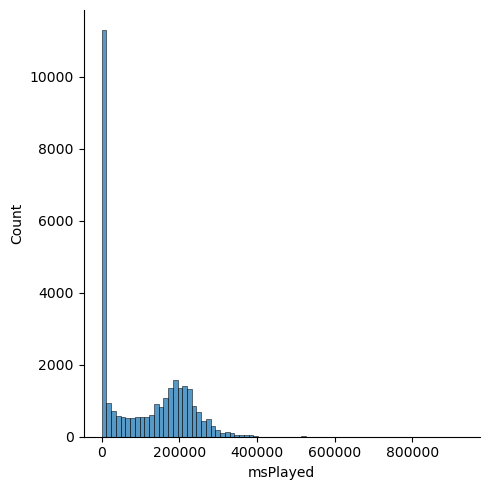

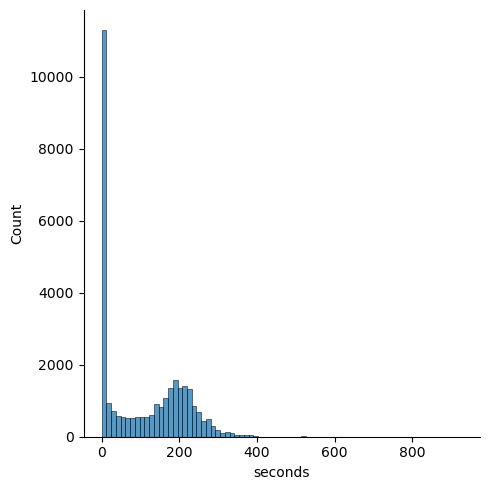

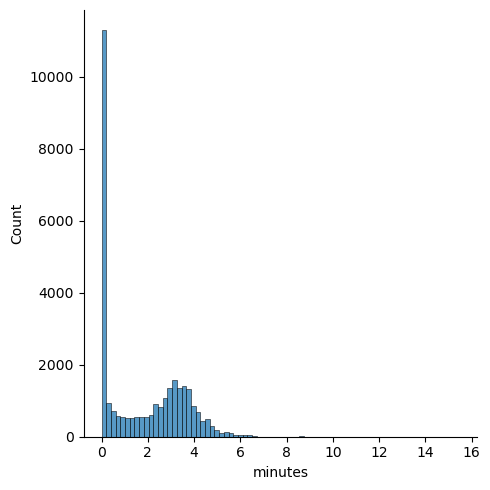

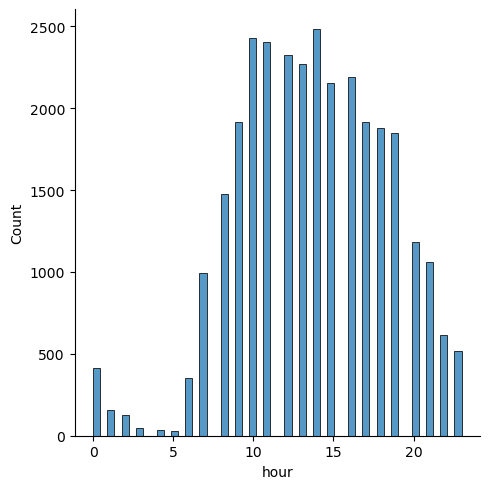

In [15]:
# continuous distributions 
cat = personal.select_dtypes(include=['number']).columns[1:]

# distribution graphs 
for each in cat:
    sns.displot(personal[each])


There are four continuous variables in the personal data set, msplayed, seconds, minutes, and hour. The first three represent he duration of time that each song was played for and the hour variables represents the hour during the day that I listened to it. The first three variables all will follow the same distribution with the most common values being close to 0 (aka I skipped the song). If looks at the hour variable, it looks pretty normally distributed if you look at it from the perspective of the hours i would be up during the day (starting around 7am instead of midnight).

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


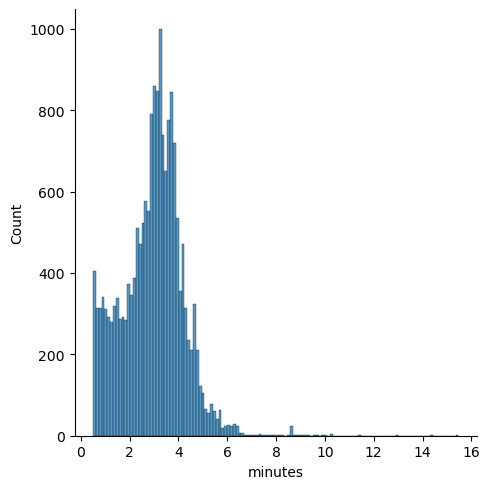

In [16]:
sns.displot(personal[personal.played==True].minutes)

When looking at the duration of play of songs I listened to, it appears to be normally distributed, with the mode being around 3.5 minutes. There are some extreme outliers (10-15 minutes) that I will need to look into. The outliers just over 8 minutes are very likely all American Pie by Don McLean. 

In [17]:
personal[personal.minutes > 11]

,index,endTime,artistName,trackName,msPlayed,seconds,minutes,played,date,dayofweek,hour,timeofday
4410,4410,2023-04-09 18:38:00,Parquet Courts,Uncast Shadow of a Southern Myth,862605,862.605,14.376750,True,2023-04-09,Sunday,18,Night
7347,7347,2023-05-13 13:38:00,Don McLean,American Pie,778271,778.271,12.971183,True,2023-05-13,Saturday,13,Afternoon
11809,1809,2023-06-10 17:43:00,Don McLean,American Pie,686820,686.820,11.447000,True,2023-06-10,Saturday,17,Afternoon
12630,2630,2023-06-17 14:23:00,Don McLean,American Pie,927854,927.854,15.464233,True,2023-06-17,Saturday,14,Afternoon


Being that none of the songs that are played for more than 11 minutes are not actually 11 minutes long, I would assume that these entries are songs that I started listening to, almost finished, and then restarted leading to a single song lasting for double the actual length. 

The distribution of the personal data set and the global data set are not extremely import to this project as no statistical tests will be run on them, however it is interesting to explore in this early phase. 

### Distribution of Listening 


In [20]:
# groupby the track name to see how many minutes I am listening to each song 
personal_gb = personal.groupby('trackName')['minutes'].sum().sort_values(ascending=False)
# show first 20 rows
personal_gb.head(20)

trackName
DUCKWORTH.                                    508.165467
Barbie Dreams                                 471.803033
N95                                           351.261300
American Pie                                  345.672283
Father Time (feat. Sampha)                    344.940417
The Night Josh Tillman Came To Our Apt.       320.750917
Out Of The Woods                              315.702800
vampire                                       311.142217
Revival                                       308.274950
United In Grief                               308.012050
Me and Your Mama                              304.051417
New Romantics                                 293.320417
Strange Weather                               292.767467
It's Still Rock and Roll to Me                285.667117
Bigger Boys and Stolen Sweethearts            282.350633
Movin' Out (Anthony's Song)                   278.576800
From The Ritz To The Rubble                   275.378150
bad idea right?      

It looks like even within my top ten songs there is a steep drop off of in how many minutes I am listening to my favorite songs. 

In [22]:
# groupby the track name to see how many times I am listening to each song 
personal_gb = personal.groupby('trackName')['minutes'].count().sort_values(ascending=False)
# show first 20 rows
personal_gb.head(20)

trackName
DUCKWORTH.                                 148
N95                                        134
Baby I'm Yours                             133
Barbie Dreams                              131
vampire                                    124
Bigger Boys and Stolen Sweethearts         123
It's Still Rock and Roll to Me             122
The Night Josh Tillman Came To Our Apt.    120
Strange Weather                            119
bad idea right?                            117
Father Time (feat. Sampha)                 117
Mother                                     116
Out Of The Woods                           114
The Dream Synopsis                         109
Crying Lightning                           108
Doubt                                      107
From The Ritz To The Rubble                106
Movin' Out (Anthony's Song)                102
Chateau Lobby #4 (in C for Two Virgins)    100
Last Nite                                   97
Name: minutes, dtype: int64

The same this is true when looking at the number of times I listen to each song.

In [27]:
# groupby the artist name to see how many times I am listening to each artist
personal_gb = personal.groupby(['artistName'])['minutes'].count().sort_values(ascending=False)
# show first 20 rows
personal_gb.head(20)

artistName
Arctic Monkeys             2246
Olivia Rodrigo              753
Taylor Swift                657
Kendrick Lamar              641
Charli XCX                  438
Father John Misty           338
Matt Maltese                328
The Walters                 312
Billy Joel                  308
Cage The Elephant           305
The Front Bottoms           297
The Last Shadow Puppets     296
The Strokes                 295
Peach Pit                   281
Florence + The Machine      280
The Wombats                 278
Nicki Minaj                 275
Slaughter Beach, Dog        259
Lorde                       251
Zach Bryan                  236
Name: minutes, dtype: int64

There is a huge drop off in how frequently I listen to a lot of artists too. 

In [29]:
# groupby the artist name and find the number of unique songs I listen to from each one 
personal_gb = personal.groupby(['artistName'])['trackName'].nunique().sort_values(ascending=False)
# show first 20 rows
personal_gb.head(20)

artistName
Taylor Swift              82
Twenty One Pilots         70
Arctic Monkeys            62
Florence + The Machine    57
Olivia Rodrigo            34
Britney Spears            31
Bo Burnham                30
Nicki Minaj               27
Charli XCX                25
The Wombats               24
The Front Bottoms         24
Kendrick Lamar            24
Lorde                     24
Queen                     23
Cage The Elephant         22
The Walters               22
Matt Maltese              22
Kanye West                20
Lana Del Rey              20
Ariana Grande             19
Name: trackName, dtype: int64

There is a big drop off in the number of songs I listen to by each artist. This is probably magnified by the fact that the top five artists are ones that I will shuffle their complete discography. 

In [34]:
personal_gb = personal.groupby(['trackName'])['minutes'].count()
personal_gb[personal_gb==1].count()

1002

There are 1002 songs out of the over 30,000 that I listened to in the past year that I only listened to 1 time. 

# Data Dictionary 

<center>

## Personal 
Variable Name | Description | Possible Value 
:----------: | :-----------: | :-----------:
endTime | The date/timestamp the song was completed at | 2023-06-17 14:23:00
artistName | The name of the artist how performs the song | Don McLean
trackName | The title of the song | American Pie
msPlayed | How many milliseconds I listened to the song | 927854
seconds | How many seconds I listened to the song | 927.854
minutes | How many minutes I listened to the song | 15.464233
played | A boolean determining whether or not I listened to the song (based on a 30 seconds benchmark) | True or False 
date | Just the date of listening | 2023-06-17 
dayofweek | What day of the week the observation is from | Saturday
hour | What hour during the day it was listened to | 14
timeofday | What time of the day it was listened to | Afternoon


## Global 
Variable Name | Description | Possible Value 
:----------: | :-----------: | :-----------:
artist_name | The name of the artist how performs the song | Miley Cyrus
track_name | The title of the song | Flowers
is_explicit | Whether or not the song is explicit | False
genres | A list of genres the song is considered | ['pop']
daceability | The danceablity rating of the song | 0.706
valence | The valence of the song | 0.632
energy | The energy score of the song | 0.691
loudness | How loud the song is | -4.775
acousticness | How many acousticness is in the song | 0.0584
instrumentalness | The amount of instumental sound in the song | 0.000070
liveness | Amount of live performance in the song | 0.0232
speechiness | The amount of spoken work in the song | 0.0633
key | The key of the song | 0
tempo | The tempo of the song (bpm) | 118.048
mode | The mode of the song | 1
duration_ms | How long to song is in milliseconds | 200600
popularity | The Spotify popularity ranking of the song | 94
minutes | How many minutes the song is | 3.343333
</center>

# 

# UI Components 
1. Because I have two data sets that I want to use in this project, I want to create at least one UI component that allows the user to toggle between looking at all of my data, all of the global data, and the intersection between the two. This might be in the form of a dropdown that allows the user to select to look at just my data, just the global data, both, or the intersection of the two or a set of radio buttons that allow them to select my data the global data or both.
2. I listen to a lot of songs, some of which I don't listen to frequently as shown above. To help users navigate this, assigning each song a rank and allowing the user to determine the rank threshold a song has to meet in order to be shown in visualizations could be helpful. This would likely be in the form of a range slider. 
3. When looking at the global data set, there are a lot of metrics that are shown. Being able to control a dropdown menu that changes the x or y axis would allow a user to see a lot of interactions between all of these variables without cluttering the screen. 

# Data Visualization Ideas
1. A bar chart that shows how much music I am listening to at each hour of the day. Perhaps this chart could be skewed into a circle (like polar coordinates would in ggplot) to mimic where the hour would be displayed on a clock. The user might be able to select different durations of time for this plot (maybe using a range slider).
2. A scatter plot that displays different metrics from the global data set ont eh x and y axis. Perhaps making this so if an option is selected on one axis it cannot be selected on the other. Potentially also with a toggle that makes it so it only show the points that represent songs that are in my streaming history. 
3. A bar chart that shows how many times I listen to my top songs. The number of top songs could maybe be changed to a certain extent (i.e. top 10, 20, or 50). This could also be toggled between the number of times that I listened to a song and the number of minutes I listened to a song. 
4. I am not sure what form this plot would take, but some sort of whole number plot or area visualization of the total number of songs that are in my data set that the user can toggle to remove the songs that I didn't play. This is because I tend to skip a lot of songs so I am sure the 30000 songs in the data set would drop significantly. 
5. A scatter plot that show the listening time of each artist vs the percent of their songs that I skip (played==false). Could maybe be able to change the the listening time of the artist to different metrics(the number of their songs I listen to, the number of times I listened to their songs).